# Installs and settings

In [ ]:
%pip install pandas
%pip install catboost
%pip install xgboost
%pip install sklearn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install csv
%pip install joblib
%pip install scipy
%pip install h5py scikit-optimize
%pip install optuna



In [ ]:
import pandas as pd

import seaborn as sns

import csv

import xgboost
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import catboost as cb
from catboost import CatBoostError

import joblib

import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer , mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import optuna

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import math

# Importing file and first analysis

In [3]:
%%time
data_chunk = pd.read_csv(f'Documents\_lead__202210181143.csv',chunksize=100_000)
data_chunk

CPU times: total: 15.6 ms
Wall time: 7.99 ms


In [4]:
%%time
#storing the chunks after iterating from chunk object

chunk_data=[chunk for chunk in data_chunk]

#concatnating dataframes to make it a complete dataset

dataset=pd.concat(chunk_data)

<timed exec>:3: DtypeWarning: Columns (16,17,29,42,43,45,47,48,49,50,51,55,64,74,75,76,78) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,19,20,21,22,24,29,33,42,43,45,49,50,51,55,64,74,75,78) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,19,20,21,22,28,33,55,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,24,42,43,49,50,51,55,64,74,75) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 10.1 s
Wall time: 10.2 s


In [5]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   427579 non-null  int64  
 1   date_create          427579 non-null  object 
 2   date_modify          427579 non-null  object 
 3   created_by_id        427579 non-null  int64  
 4   modify_by_id         427579 non-null  int64  
 5   assigned_by_id       427579 non-null  int64  
 6   opened               427579 non-null  object 
 7   company_id           24062 non-null   float64
 8   contact_id           1435 non-null    float64
 9   status_id            427579 non-null  object 
 10  status_description   0 non-null       float64
 11  product_id           0 non-null       float64
 12  opportunity          427579 non-null  float64
 13  currency_id          427579 non-null  object 
 14  opportunity_account  427579 non-null  float64
 15  account_currency_

In [6]:
dataset

,id,date_create,date_modify,created_by_id,modify_by_id,assigned_by_id,opened,company_id,contact_id,status_id,...,partnerid,kvvatrub,kvrub,probability_sbs,probability,calendarization,kvpct,kpk,efsid,gwp
0,535670,2022-10-03 13:20:21.000,2022-10-05 11:25:58.000,1,1685,1685,N,NaN,NaN,CONVERTED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,324084,2022-08-10 07:35:22.000,2022-10-05 09:36:42.000,1,2849,2849,N,NaN,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,324372,2022-08-10 07:35:53.000,2022-10-05 09:35:55.000,1,2849,2849,N,NaN,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,532596,2022-09-08 10:09:20.000,2022-10-05 12:31:15.000,1,2700,2700,N,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,535856,2022-10-04 14:41:27.000,2022-10-05 09:38:24.000,1,2868,2868,N,1007446.0,NaN,CONVERTED,...,18656.0,0.0,0.00,0,90,2022-10-05,0.0,NaN,NaN,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427574,470061,2022-08-10 16:03:20.000,2022-08-10 16:41:47.000,1,2153,2569,N,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427575,536039,2022-10-05 12:02:08.000,2022-10-05 12:04:48.000,2147,2147,2147,Y,100502.0,NaN,3,...,18623.0,333934.0,278278.33,30,70,2022-11-03,20.0,NaN,NaN,1669670.0
427576,470426,2022-08-10 16:04:01.000,2022-08-10 16:04:01.000,1,1,2039,N,NaN,NaN,NEW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427577,470708,2022-08-10 16:04:36.000,2022-08-10 16:04:36.000,1,1,2039,N,NaN,NaN,NEW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.value_counts()

Series([], dtype: int64)

In [8]:
dataset["date_create"] = pd.to_datetime(dataset["date_create"])
dataset["date_modify"] = pd.to_datetime(dataset["date_modify"])
dataset["calendarization"] = pd.to_datetime(dataset["calendarization"],  errors = 'coerce')
dataset["date_closed"] = pd.to_datetime(dataset["date_closed"])


In [9]:
# Categorical types
dataset["opened"] = dataset["opened"].astype("category")
dataset["currency_id"] = dataset["currency_id"].astype("category")
dataset["account_currency_id"] = dataset["account_currency_id"].astype("category")
dataset["currency_id"] = dataset["currency_id"].astype("category")
dataset["status_id"] = dataset["status_id"].astype("category")
dataset["honorific"] = dataset["honorific"].astype("category")
dataset["has_phone"] = dataset["has_phone"].astype("category")
dataset["has_email"] = dataset["has_email"].astype("category")
dataset["status_semantic_id"] = dataset["status_semantic_id"].astype("category")
dataset["is_return_customer"] = dataset["is_return_customer"].astype("category")
dataset["prodcategoryid"] = dataset["prodcategoryid"].astype("category")
dataset["crm_import_file"] = dataset["crm_import_file"].astype("category")
dataset["crm_file"] = dataset["crm_file"].astype("category")
dataset["file_error"] = dataset["file_error"].astype("category")
dataset["pledgeid"] = dataset["pledgeid"].astype("category")
dataset["pl_checkbox"] = dataset["pl_checkbox"].astype("category")
dataset["saleschannelid"] = dataset["saleschannelid"].astype("category")



In [10]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   427579 non-null  int64         
 1   date_create          427579 non-null  datetime64[ns]
 2   date_modify          427579 non-null  datetime64[ns]
 3   created_by_id        427579 non-null  int64         
 4   modify_by_id         427579 non-null  int64         
 5   assigned_by_id       427579 non-null  int64         
 6   opened               427579 non-null  category      
 7   company_id           24062 non-null   float64       
 8   contact_id           1435 non-null    float64       
 9   status_id            427579 non-null  category      
 10  status_description   0 non-null       float64       
 11  product_id           0 non-null       float64       
 12  opportunity          427579 non-null  float64       
 13  currency_id   

# Cleaning up dataset

## Deleting columns

In [11]:
dataset.drop('comments', axis=1, inplace=True)

dataset.drop('full_name', axis=1, inplace=True)
dataset.drop('name', axis=1, inplace=True)
#dataset.drop('last_name', axis=1, inplace=True)
dataset.drop('second_name', axis=1, inplace=True)
dataset.drop('title', axis=1, inplace=True)
dataset.drop('id', axis=1, inplace=True)
dataset.drop('source_description', axis=1, inplace=True)
dataset.drop('address', axis=1, inplace=True)
dataset.drop('status_description', axis=1, inplace=True)
dataset.drop('product_id', axis=1, inplace=True) 
dataset.drop('search_content', axis=1, inplace=True) #IDK ABOUT THIS ONE
#dataset.drop('client_fio', axis=1, inplace=True) #
dataset.drop('currency_id', axis=1, inplace=True) #
dataset.drop('account_currency_id', axis=1, inplace=True) #
dataset.drop('exch_rate', axis=1, inplace=True) # dataset.drop(dataset[dataset['exch_rate'] == 64.36 ].index, inplace = True)
dataset.drop('birthday_sort', axis=1, inplace=True) #
dataset.drop('client_phone', axis=1, inplace=True) #
dataset.drop('has_imol', axis=1, inplace=True) #


## Dealing with Nulls

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 64 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_create          427579 non-null  datetime64[ns]
 1   date_modify          427579 non-null  datetime64[ns]
 2   created_by_id        427579 non-null  int64         
 3   modify_by_id         427579 non-null  int64         
 4   assigned_by_id       427579 non-null  int64         
 5   opened               427579 non-null  category      
 6   company_id           24062 non-null   float64       
 7   contact_id           1435 non-null    float64       
 8   status_id            427579 non-null  category      
 9   opportunity          427579 non-null  float64       
 10  opportunity_account  427579 non-null  float64       
 11  source_id            422546 non-null  object        
 12  last_name            460 non-null     object        
 13  company_title 

In [13]:
dataset.isnull().sum()

date_create             0
date_modify             0
created_by_id           0
modify_by_id            0
assigned_by_id          0
                    ...  
calendarization    412053
kvpct              394446
kpk                418745
efsid              427579
gwp                390214
Length: 64, dtype: int64

In [14]:
df = dataset.dropna(axis=1,  # WAS 15_000
                thresh=15_000).copy() #.copy() is only here to suppress a warning.
df['contact_id'] = dataset['contact_id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_create          427579 non-null  datetime64[ns]
 1   date_modify          427579 non-null  datetime64[ns]
 2   created_by_id        427579 non-null  int64         
 3   modify_by_id         427579 non-null  int64         
 4   assigned_by_id       427579 non-null  int64         
 5   opened               427579 non-null  category      
 6   company_id           24062 non-null   float64       
 7   status_id            427579 non-null  category      
 8   opportunity          427579 non-null  float64       
 9   opportunity_account  427579 non-null  float64       
 10  source_id            422546 non-null  object        
 11  company_title        372983 non-null  object        
 12  date_closed          183380 non-null  datetime64[ns]
 13  has_phone     

In [ ]:
for col in df:
  print("\n")
  print(col,df[col].unique())

In [ ]:
for col in df:
  print(col,df[col].nunique())

In [ ]:
df['source_id'].value_counts()

In [18]:
#Cleaning Nulls 

def preprocessing_probability(data):
  data["probability_sbs"]=data["probability_sbs"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  data["probability"]=data["probability"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  return None
  
def preprocessing_zeroing(data):
  data["kvvatrub"]=data["kvvatrub"].fillna(0)
  #data["kvpct"]=data["kvpct"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  return None

def run_pipe(dff):
  preprocessing = Pipeline(steps=[
    # преобразуем признаки, исходя из прошлого анализа
    ('probability_sbs', FunctionTransformer(preprocessing_probability(dff)))
    ]
    )
  return preprocessing.fit_transform(dff)
df = pd.DataFrame(run_pipe(df))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_create          427579 non-null  datetime64[ns]
 1   date_modify          427579 non-null  datetime64[ns]
 2   created_by_id        427579 non-null  int64         
 3   modify_by_id         427579 non-null  int64         
 4   assigned_by_id       427579 non-null  int64         
 5   opened               427579 non-null  category      
 6   company_id           24062 non-null   float64       
 7   status_id            427579 non-null  category      
 8   opportunity          427579 non-null  float64       
 9   opportunity_account  427579 non-null  float64       
 10  source_id            422546 non-null  object        
 11  company_title        372983 non-null  object        
 12  date_closed          183380 non-null  datetime64[ns]
 13  has_phone     

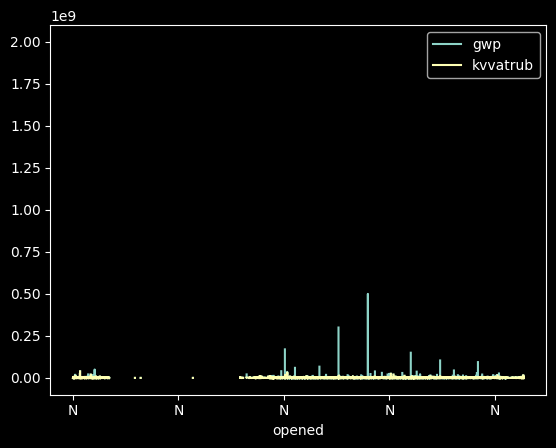

In [20]:
df.plot(x="opened", y=["gwp", "kvvatrub","pl_checkbox"])
plt.show()

In [ ]:
sns.pairplot(df, hue='opened', size=2.5)

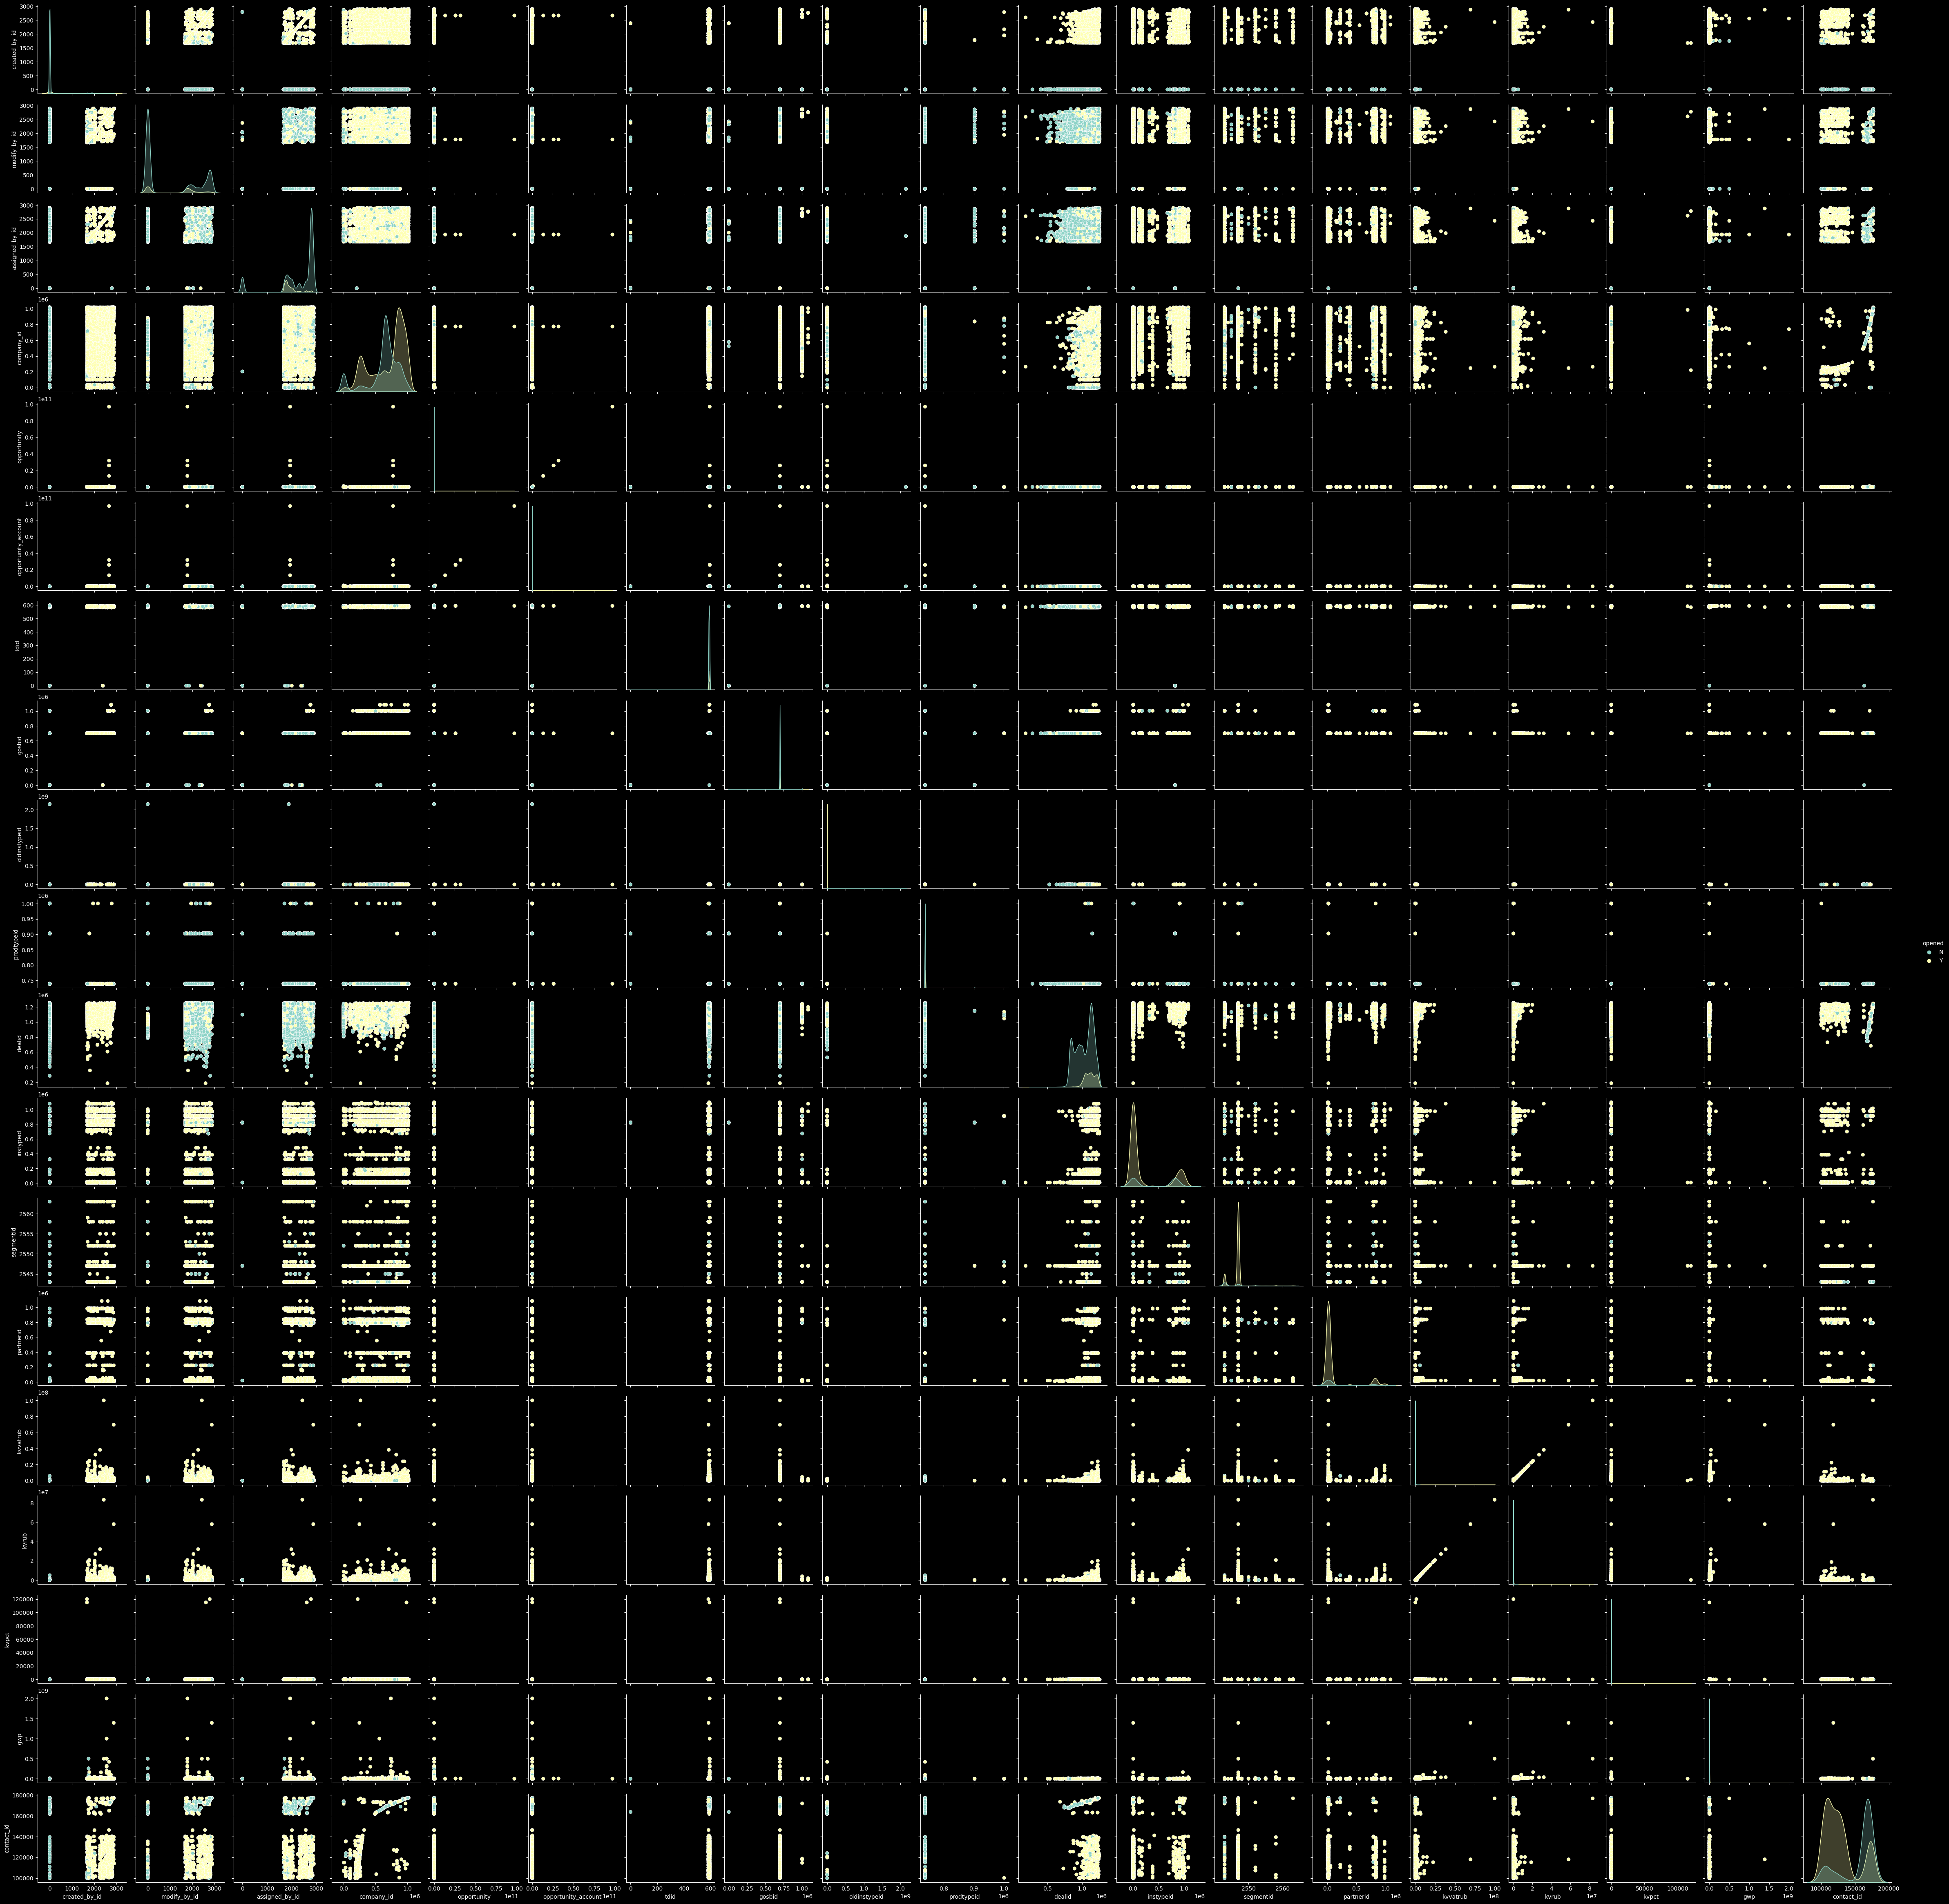

In [21]:
sns.pairplot(df, hue='opened')

In [ ]:
g = sns.PairGrid(df, hue="opened", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

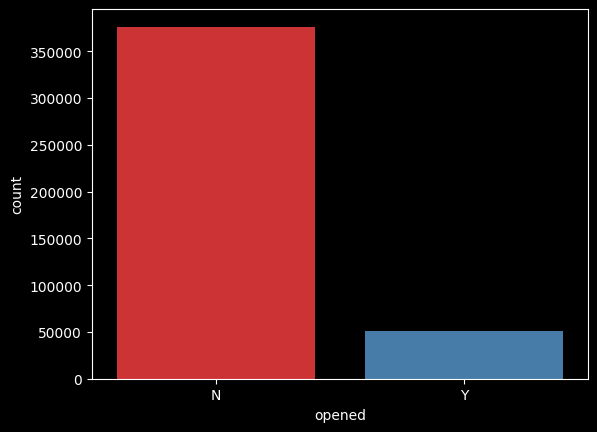

In [23]:
ax = sns.countplot(x="opened", data=df,palette="Set1")

<AxesSubplot: >

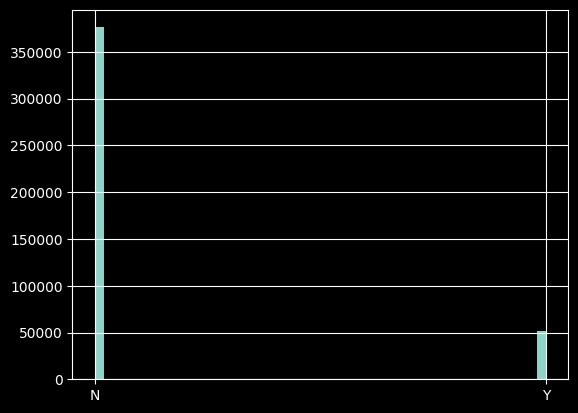

In [24]:
df["opened"].hist(bins=50)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")
plt.title('Корреляционная матрица')

In [ ]:
x = df[["opened", "risk1"]]

f, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x = "opened", y = "risklist", data = x, palette = 'husl')
plt.title('Риски и открытия', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("opened", fontsize = 15)
plt.ylabel("risklist", fontsize = 15)

In [ ]:
x = df[["opened", "risklist"]]

f, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x = "opened", y = "risklist", data = x, palette = 'husl')
plt.title('Риски и открытия', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("opened", fontsize = 15)
plt.ylabel("risklist", fontsize = 15)